In [3]:
# import standard libraries
from autograd import numpy as np
from autograd import grad
from autograd.misc.optimizers import adam, sgd
from autograd import scipy as sp
import autograd.numpy.random as npr
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import sys
import time

# import our libraries
import bayes_helpers as bh
from utils import generate_data, run_toy_nn
from feed_forward import Feedforward
from nlm import NLM
from luna import LUNA

from config import *

### Generate Cubic Dataset

Generates 100 datapoints for train and 100 points for test according to the function

$$y = x^3 + \epsilon$$

$$\epsilon \sim N(0, 3^2)$$

In [4]:
x_train, y_train, x_test = generate_data()

### Train NLM

In [5]:
t0 = time.time()
nlm = NLM(prior_variance,y_noise_variance, regularization_param_nlm, nlm_architecture, random_seed)
nlm.train(x_train,y_train, opt_params)
print(f"time: {np.round(time.time() - t0, 3)} seconds")

 Iteration 0 lower bound 5372.473929781775; gradient mag: 13788.863606396531
Done Training
time: 0.646 seconds


### Train LUNA

In [6]:
t0 = time.time()
luna = LUNA(prior_variance, y_noise_variance, regularization_param_luna, similarity_param, luna_architecture, random_seed)
luna.train(x_train, y_train, opt_params)
print(f"time: {np.round(time.time() - t0, 3)} seconds")

 Iteration 0 lower bound 292271.59438347584; gradient mag: 152375.4676192643
Done Training
time: 123.888 seconds


### Compare Results
- notice they have identical post processing function calls

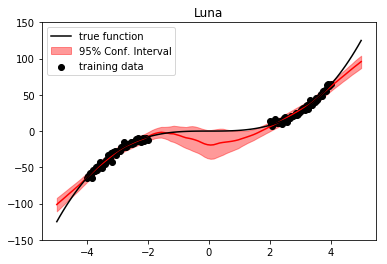

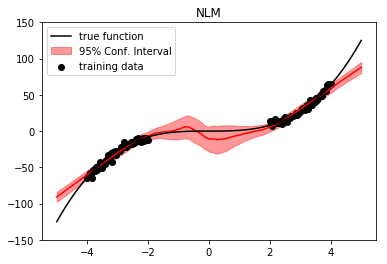

In [7]:
# fig, ax = plt.subplots(1,2, figsize = (12, 6))
i = 0
for name, model in {"Luna":luna,"NLM":nlm}.items():
    posterior_predictions, posterior_predictive_samples = model.predict(x_test)
    
    bh.viz_pp_samples(x_train, y_train,x_test.flatten(),posterior_predictive_samples,name)
